# Task 1: Prediction using Supervised ML
## Field: Data Science and Business Analytics 
#### Dataset used: https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

## Loading the data 

In [1]:
import pandas as pd

df=pd.read_csv("data.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Analysing the data

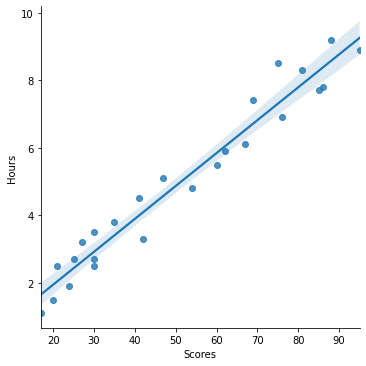

In [2]:
import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
sns.lmplot(x = 'Scores', y = 'Hours', data = df)

#### We can see a linear relation here. Hence, We can easily solve this task using Linear regression. 
Let's split the data first into train and test first

In [3]:
X = df.iloc[:,:1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [4]:
y = df.iloc[:,1:].values
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

#### Training the Linear Regression model

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
lr.score(X_test, y_test)

0.9646003563528418

In [8]:
y_pred=lr.predict(X_test)
test = pd.DataFrame({'Actual' :  y_test.ravel(), 'Predicted' : y_pred.ravel()})
test

,Actual,Predicted
0,20,18.358357
1,21,27.922729
2,76,70.005963
3,25,29.835603
4,35,40.356412
5,30,29.835603
6,81,83.396083


<AxesSubplot:>

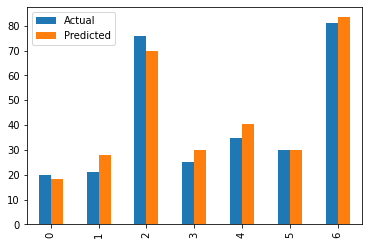

In [9]:
test.plot(kind = 'bar')

In [10]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 3.901557623951209


In [11]:
from pywebio.input import input, FLOAT
from pywebio.output import put_text

hr = input("Enter the no of hours studied ：", type=FLOAT)
predict = lr.predict([[hr]])
for i in predict:
    put_text("If you study for %.2f hours, you can expect to get %.2f" % (hr,i[0]))

